# BigQuery Reusable Functions

> The methods in this module can be used to **interact with the BigQuery service**.

In [ ]:
#|hide
#| eval: false
! [ -e /content ] && pip install -Uqq gcp_python_client_functions

## Prerequisites

#### Setting up a GCP environment

- [Having a GCP project](https://console.cloud.google.com/project?_ga=2.198902124.2143434848.1693760593-97706481.1691864848) (if you create one, you can [this follow a naming convention](https://stepan.wtf/cloud-naming-convention/#:~:text=The%20rule%20of%20thumb%20is,or%20within%20a%20given%20scope.)).
- Enable billing for the project you'll work with by going to [Cloud Billing](https://console.cloud.google.com/billing/) and selecting your project on the top right corner (300 USD free credits are associated with new billing accounts + a [big list of free tier products](https://cloud.google.com/free?_ga=2.49992806.-1313173218.1693453955)). 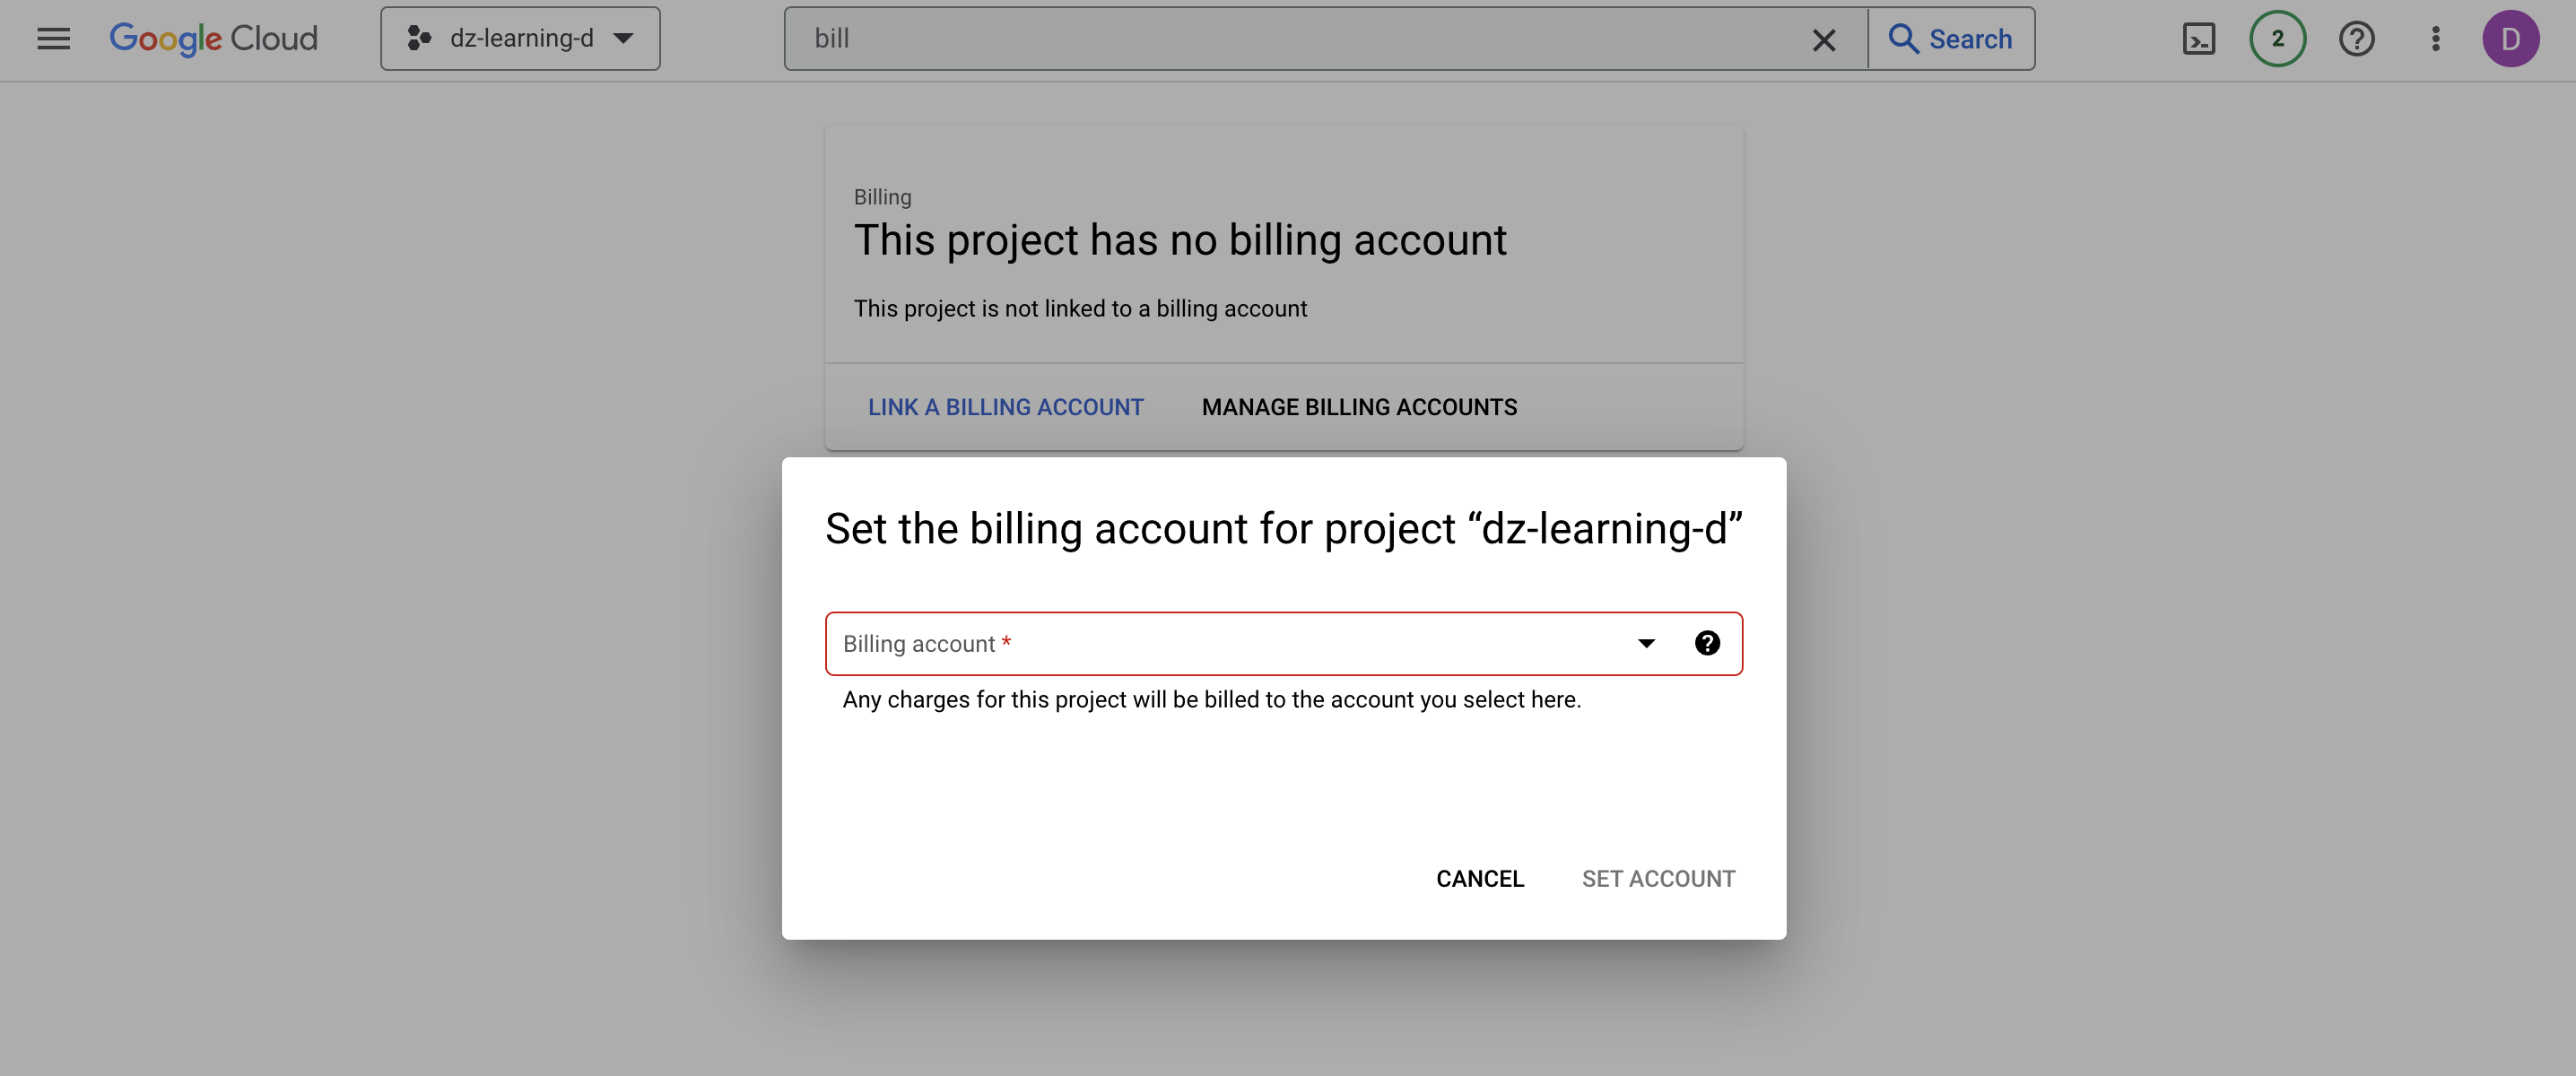
- Enable BigQuery API by going to [APIs & Services](https://console.cloud.google.com/apis/) on the cloud console and looking for the BigQuery API.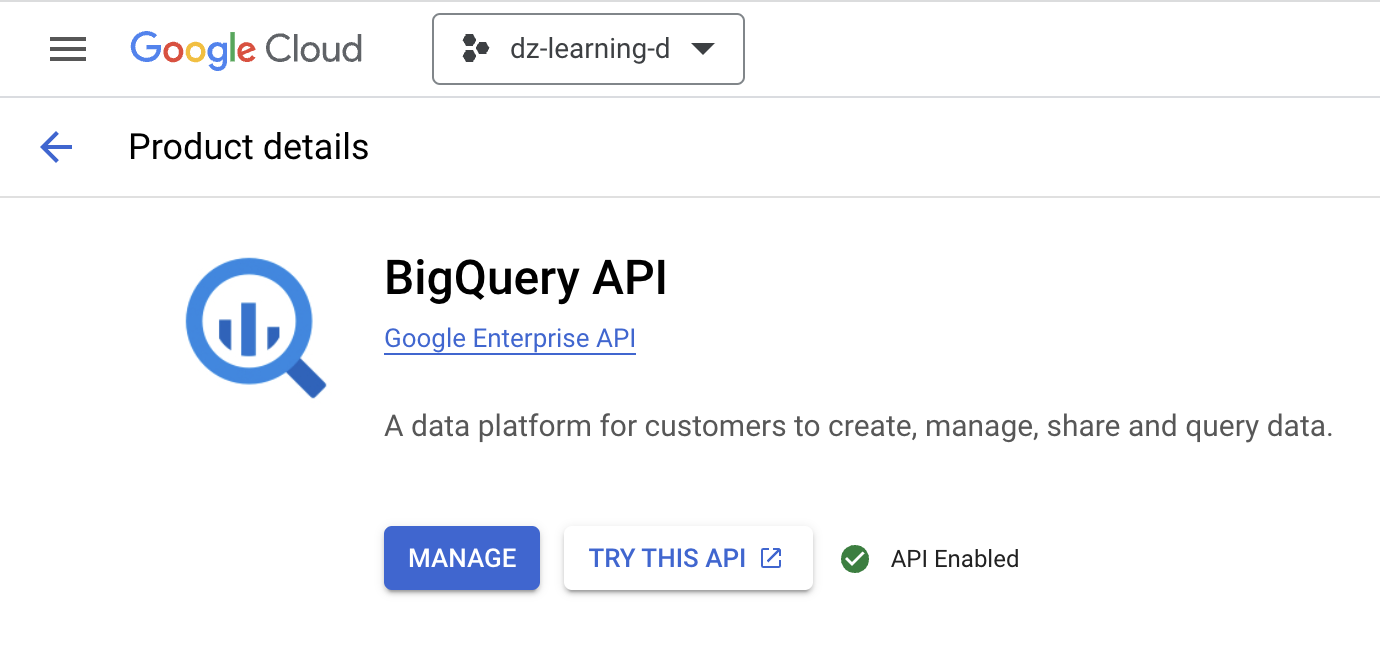  

#### Authentication

[Authenticating](https://googleapis.dev/python/google-api-core/latest/auth.html) before using the following methods by:  
- (locally) using the [Google Cloud SDK](http://cloud.google.com/sdk)(installation needed):

In [ ]:
#!gcloud auth login --update-adc

- (elsewhere) [downloading a service account JSON keyfile](https://cloud.google.com/iam/docs/keys-create-delete#creating) and point to it using an environment variable:

In [ ]:
#!export GOOGLE_APPLICATION_CREDENTIALS="/path/to/keyfile.json"

- or through [Workflow Identity Provider](https://www.youtube.com/watch?v=zRF5uTWXV8Y) (recommended, what we used to authenticate within GitHub Actions).

## Methods

In [ ]:
#| default_exp bigquery

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#|export
from google.cloud import bigquery

In [ ]:
#| export
def query_to_df(
    project_id: str, # GCP project ID
    query_str: str, # String variable containing SQL Query
):
    """
    Perform a SQL query to BigQuery and save the results in a dataframe (gcloud authentication needed).
    """
    client = bigquery.Client(project_id)

    df = client.query(
        query_str,
    ).to_dataframe(create_bqstorage_client = True)

    return df

Example:

In [ ]:
PROJECT = 'dz-learning-d'
QUERY = """
        SELECT name FROM `bigquery-public-data.usa_names.usa_1910_2013`
        WHERE state = "TX"
        LIMIT 100
        """
df = query_to_df(PROJECT, QUERY)
df

,name
0,Mary
1,Roberta
2,Marguerite
3,Katie
4,Eunice
...,...
95,Rita
96,Elida
97,Billie
98,Ida


In [ ]:
#| hide
import pandas as pd; df_test = pd.read_pickle('test_artifacts/00_bigquery_query_to_df.pkl'); assert df_test.equals(df)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()

Portions of this page are modifications based on work created and [shared by Google](https://developers.google.com/readme/policies) and used according to terms described in the [_Creative Commons 4.0 Attribution License_](https://creativecommons.org/licenses/by/4.0/).